<a href="https://colab.research.google.com/github/martimov/MoniTARE/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Import libraries
import cv2 as cv
from google.colab.patches import cv2_imshow
from sklearn.cluster import MeanShift, estimate_bandwidth
import os
import matplotlib.pyplot as plt
import numpy as np
import math

# Allows to render matplotlib figures directly in the notebook
%matplotlib inline 

import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
!git clone https://github.com/martimov/MoniTARE.git 

fatal: destination path 'MoniTARE' already exists and is not an empty directory.


In [4]:
%cd MoniTARE

/content/MoniTARE


In [5]:
!ls

Perspective_correction.ipynb
README.md
Segmentation.ipynb
stereoLeft
stereoRight
video_BYEDP210102_2022-03-22_095346_wideshot.mp4_snapshot_00.10.663.jpg


(1080, 1920, 3)


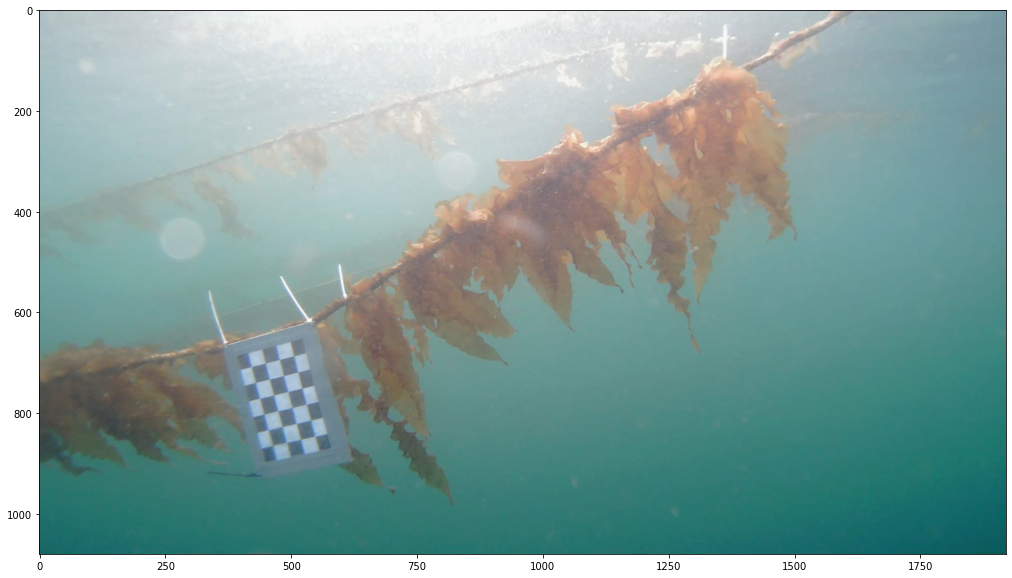

In [6]:
# Load an image and display
imgPath = 'video_BYEDP210102_2022-03-22_095346_wideshot.mp4_snapshot_00.10.663.jpg'
img = cv.imread(imgPath, cv.IMREAD_COLOR)

# Convert to grayscale
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Display image
plt.imshow(img[:, :, ::-1]);
print(img.shape)

# Perspective correction

In [7]:
################ FIND CHESSBOARD CORNERS - OBJECT POINTS AND IMAGE POINTS #############################

chessboardSize = (4, 6)
frameSize = (1920, 1080)

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

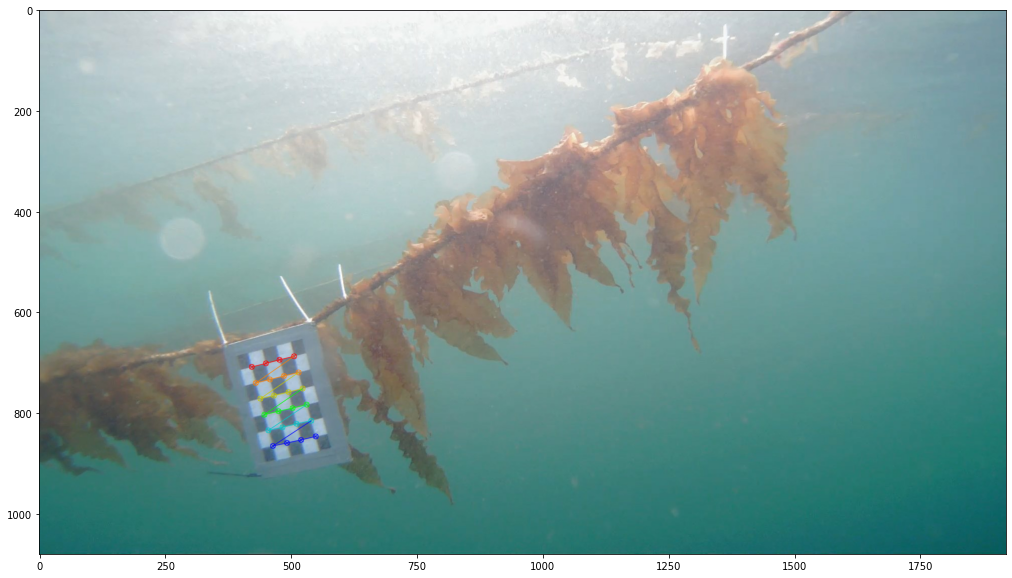

In [8]:
# Find the chess board corners
ret, corners = cv.findChessboardCorners(imgGray, chessboardSize, None)

# Copy image
imgCopy = img.copy()

# If found, add object points, image points (after refining them)
if ret == True:
  objpoints.append(objp)
  
  corners = cv.cornerSubPix(imgGray, corners, (11,11), (-1,-1), criteria)
  imgpoints.append(corners)
  # Draw and display the corners
  imgCopy = cv.drawChessboardCorners(imgCopy, chessboardSize, corners, ret)
  plt.imshow(imgCopy[:, :, ::-1]);

In [40]:
# Print the four corner points.
quad = np.float32([corners[0], corners[3], corners[23], corners[20]])
print(quad)

[[[422.08246 708.2529 ]]

 [[506.34476 686.9322 ]]

 [[548.57983 845.7995 ]]

 [[464.06226 864.87213]]]


In [49]:
# Define the four corners points (using the corners directly doesnt work for some reason).
input = np.float32([[422.08246, 708.2529], [506.34476, 686.9322], [548.57983, 845.7995], [464.06226, 864.87213]])

# Define the size of the output image.
hh, ww = img.shape[:2]

# Get top and left dimensions and set to output dimensions of chessboard.
# The math.hypot() method returns the Euclidean norm. The Euclidian norm is the distance from the origin to the coordinates given.
# width = math.hypot(x1 - x2, y1 - y2)
# height = math.hypot(x1 - x4, y1 - y4)
width = math.hypot(input[0,0]-input[1,0], input[0,1]-input[1,1])
height = math.hypot(input[0,0]-input[3,0], input[0,1]-input[3,1])
print("width:",width, "height:",height)

# Set upper left coordinates for output chessboard (same as upper left coordinates for the input chessboard).
x = input[0,0]
y = input[0,1]

# Specify output coordinates for corners of chessboard in order TL, TR, BR, BL as x.
output = np.float32([[x,y], [x+width-1,y], [x+width-1,y+height-1], [x,y+height-1]])
print(output)

width: 86.91782847021202 height: 162.14770339208278
[[422.08246 708.2529 ]
 [508.00027 708.2529 ]
 [508.00027 869.40063]
 [422.08246 869.40063]]


In [50]:
type(width)

float